#        **Welcome to Netflix Data Analysis** 


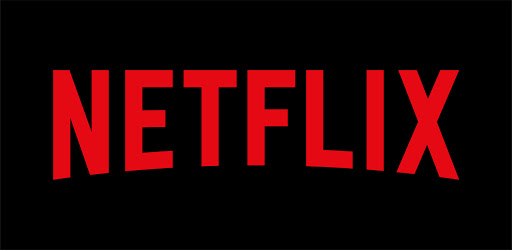

# **My Approach would be to**:

*   First Understand the given data
*   Find missing or duplicated values if any and fill those missing values accordingly
*   Find insights like which country has highest shows,Actor who acted in most films,Which day most films where released etc.,plot them and find relation among them.




In [ ]:
#first we will import all the important 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
#then we import files either from upload as csv or reading directly from link
# df=pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv")
df=pd.read_csv("/content/netflix.csv")

In [ ]:
#then we find Info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.describe(include=["int64","object"])
#we find details of data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [ ]:
df.head(10)
#first 10 rows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [ ]:
df.tail(10)
#last 10 rows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8798,s8799,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,"December 31, 2019",2014,TV-MA,131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...
8799,s8800,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,"February 15, 2018",2009,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [ ]:
print(f"Data has {df.shape[0]} rows and {df.shape[1]} columns")
#shape of Data

Data has 8807 rows and 12 columns


In [ ]:
#Find any duplicated Elements
df.duplicated().sum()

0



There exist no duplicate Elements



In [ ]:
#Find NaN values if any:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
#We find the percentage of NaN values in each column
y=df.shape[0]
print("The Null values in each proportionately")
for i in df.columns:
  x=df[i].isnull().sum()
  if x!=0:
    print(i,x/y)

The Null values in each proportionately
director 0.29908027705234475
cast 0.09367548540933349
country 0.09435676166685592
date_added 0.0011354604292040423
rating 0.0004541841716816169
duration 0.00034063812876121267


## Handling the missing **Values**

Director column has around 30 % or 2634 rows of missing values.The values are 
many so replace NaN values with "**Missing Values**"

In [ ]:
df.loc[df["director"].isnull(),"director"]="Missing Value"

In [ ]:
#Director Row will become
df["director"].value_counts()

Missing Value                     2634
Rajiv Chilaka                       19
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
Marcus Raboy                        16
                                  ... 
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Eric Bross                           1
Will Eisenberg                       1
Mozez Singh                          1
Name: director, Length: 4529, dtype: int64

Similarly cast column has 825 NaN columns and country column has 831 NaN  columns respectively.Replacing them "**Missing Values**"




In [ ]:
df.loc[df["cast"].isnull(),"cast"]="Missing Value"
df.loc[df["country"].isnull(),"country"]="Missing Value"

# Check and correct Faulty Data

We will check each row and find correct faulty data if any.


In [ ]:
df["rating"].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

Here in ratings column wrong values have been filled i.e. 74 min,84 min,66 min

In [ ]:
#Check if Duration is empty or not
indexes=[]
for i in ["74 min","84 min","66 min"]:
  indexes.append(df.loc[df["rating"]==i].index)
  print(df.loc[df["rating"]==i,["duration","rating"]])


     duration  rating
5541      NaN  74 min
     duration  rating
5794      NaN  84 min
     duration  rating
5813      NaN  66 min


In these columns the duration column has been filled in rating column.So correcting both.These 3 duration rows are the NaN values so assigning them with Duration values





In [ ]:
df.loc[df["duration"].isnull()==True]
x=df.loc[df["duration"].isnull()==True].index

In [ ]:
df.loc[df["duration"].isnull()==True,"duration"]=df["rating"]

Now Ratings column has 4 missing values and 3 wrong values

In [ ]:
df["rating"].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

Manually correcting each Values by index

In [ ]:
#Wrong values being corrected
df.loc[df.index==5541,"rating"]="TV-MA"
df.loc[df.index==5794,"rating"]="PG-13"
df.loc[df.index==5813,"rating"]="PG-13"

In [ ]:
#Finding Missing Values of Rating
df[df["rating"].isna()].index

Int64Index([5989, 6827, 7312, 7537], dtype='int64')

In [ ]:
#Correcting them too
df.loc[df.index==6827,"rating"]="TV-14"
df.loc[df.index==7312,"rating"]="PG"
df.loc[df.index==7537,"rating"]="PG-13"
df.loc[df.index==5989,"rating"]="PG-13"

In [ ]:
#Checking whether missing value has been Replaced Correctly
for i in x:
  df.loc[df.index[i],"rating"]
  print(df.loc[df.index[i]])

show_id                                                     s5542
type                                                        Movie
title                                             Louis C.K. 2017
director                                               Louis C.K.
cast                                                   Louis C.K.
country                                             United States
date_added                                          April 4, 2017
release_year                                                 2017
rating                                                      TV-MA
duration                                                   74 min
listed_in                                                  Movies
description     Louis C.K. muses on religion, eternal love, gi...
Name: 5541, dtype: object
show_id                                                     s5795
type                                                        Movie
title                                       Louis 

In [ ]:
#Find Nunique Values of each Column
for i in df.columns:
  print(i,":",df[i].nunique())

show_id : 8807
type : 2
title : 8807
director : 4529
cast : 7693
country : 749
date_added : 1767
release_year : 74
rating : 14
duration : 220
listed_in : 514
description : 8775


In [ ]:
#After all this data correction the data will look like
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Missing Value,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Missing Value,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Missing Value,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Missing Value,Missing Value,Missing Value,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Missing Value,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Missing Value,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Missing Value,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [ ]:
#show_id is not at all required so dropping that row
df.drop("show_id",axis=1,inplace=True)

Adding Few more rows like Month,Date,DayName,Year from date_added column 

In [ ]:
#We will create 4 more columns
df['date_added'] = pd.to_datetime(df['date_added'],dayfirst=False, errors='coerce').dt.date
df["day_of_week"]=pd.to_datetime(df["date_added"]).dt.day_name()
df["date_added"]=df["date_added"].astype("str")
df['year'] = df['date_added'].str.slice(0,4,1)
df['month'] = df['date_added'].str.slice(5,7,1)
df['day'] = df['date_added'].str.slice(8,10,1)

In [ ]:
#Now data will be
df.head(10)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_of_week,year,month,day
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Missing Value,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Saturday,2021,09,25
1,TV Show,Blood & Water,Missing Value,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Friday,2021,09,24
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Missing Value,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Friday,2021,09,24
3,TV Show,Jailbirds New Orleans,Missing Value,Missing Value,Missing Value,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Friday,2021,09,24
4,TV Show,Kota Factory,Missing Value,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Friday,2021,09,24
5,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Missing Value,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,Friday,2021,09,24
6,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Missing Value,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,Friday,2021,09,24
7,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",Friday,2021,09,24
8,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,Friday,2021,09,24
9,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,Friday,2021,09,24


# Data Visualization and Data Analysis

### Based on Type of Content(TV Shows vs Movies )

Movie      6131
TV Show    2676
Name: type, dtype: int64


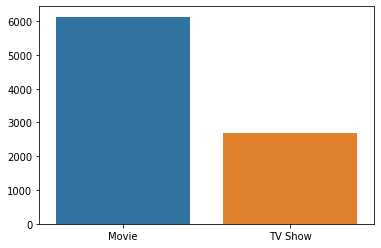

In [ ]:
x=df["type"].value_counts()
print(x)
sns.barplot(x=x.index,y=x.values)

Total Released movies are 6131 and TV shows are 2676


## Movies Vs TV shows over the years

[Text(0, 0.5, 'Number'), Text(0.5, 0, 'Release Year')]

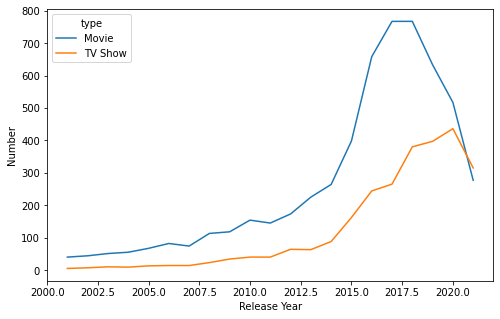

In [ ]:
df_year=df.loc[df["release_year"]>2000,["release_year","type"]]
df_year=df_year.value_counts()
plt.figure(figsize=(8,5))
axs=sns.lineplot(data=df_year,x=str("release_year"),hue="type",y=df_year.values)
axs.set(xlabel='Release Year', ylabel='Number')



Insights:

*   Movies  has increased from 2000 till 2016.But from 2017 they have been decreasing
*   TV Shows  has increased from 2000 till 2019.But from 2020 they have been decreasing
* TV shows over took movies from 2020



### Plot for Different ratings of content

TV-MA       3208
TV-14       2161
TV-PG        863
R            799
PG-13        494
TV-Y7        334
TV-Y         307
PG           288
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64


[Text(0, 0.5, 'Number'), Text(0.5, 0, 'Rating')]

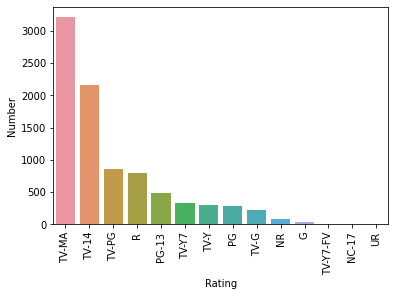

In [ ]:
rating_plot=df['rating'].value_counts(ascending=False)
print(rating_plot)
ax=sns.barplot(x=rating_plot.index,y=rating_plot.values)
ax.tick_params(axis='x', rotation=90)
ax.set(xlabel='Rating', ylabel='Number')

* "TV-MA" has more content overall of 3208 followed by TV-14






In [ ]:
rating_plot

TV-MA       3208
TV-14       2161
TV-PG        863
R            799
PG-13        494
TV-Y7        334
TV-Y         307
PG           288
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

Plot of Content Type based on Rating


                     0
rating   type         
TV-MA    Movie    2063
TV-14    Movie    1427
TV-MA    TV Show  1145
R        Movie     797
TV-14    TV Show   734
TV-PG    Movie     540
PG-13    Movie     494
TV-PG    TV Show   323
PG       Movie     287
TV-Y7    TV Show   195
TV-Y     TV Show   176
TV-Y7    Movie     139
TV-Y     Movie     131
TV-G     Movie     126
         TV Show    94
NR       Movie      75
G        Movie      41
NR       TV Show     5
TV-Y7-FV Movie       5
NC-17    Movie       3
UR       Movie       3
R        TV Show     2
PG       TV Show     1
TV-Y7-FV TV Show     1


[Text(0, 0.5, 'Number'), Text(0.5, 0, 'Rating')]

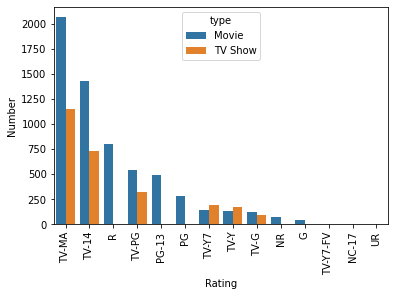

In [ ]:

rating_plot=df[['rating',"type"]].value_counts(ascending=False)
rating_plot=pd.DataFrame(rating_plot)
print(rating_plot)
rating_plot=rating_plot.reset_index()
ax=sns.barplot(data=rating_plot,x=rating_plot.rating,y=rating_plot[0],hue=rating_plot.type)
ax.tick_params(axis='x', rotation=90)
ax.set(xlabel='Rating', ylabel='Number')

### Content Based on Country

United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: country, dtype: int64


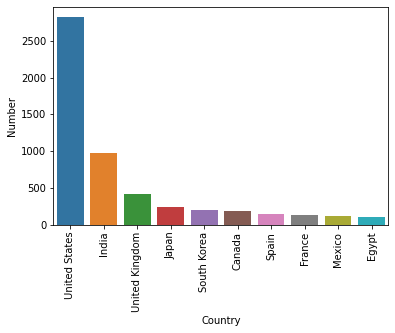

In [ ]:

country_plot=df.loc[df["country"]!="Missing Value", 'country'].value_counts(ascending=False)
country_plot=country_plot.head(10)
ax=sns.barplot(x=country_plot.index,y=country_plot.values)
ax.tick_params(axis='x', rotation=90)
ax.set(xlabel='Country', ylabel='Number')
print(country_plot)

United States has around total 2818 movies and TV shows,followed by India and United Kingdom

                                          0
country                       type         
United States                 Movie    2058
India                         Movie     893
United States                 TV Show   760
United Kingdom                TV Show   213
                              Movie     206
Japan                         TV Show   169
South Korea                   TV Show   158
Canada                        Movie     122
Spain                         Movie      97
Egypt                         Movie      92
Nigeria                       Movie      86
India                         TV Show    79
Indonesia                     Movie      77
Turkey                        Movie      76
Japan                         Movie      76
France                        Movie      75
Philippines                   Movie      73
Mexico                        Movie      70
Taiwan                        TV Show    68
United Kingdom, United States Movie      63
Canada                        TV

[Text(0, 0.5, 'Number'), Text(0.5, 0, 'Country')]

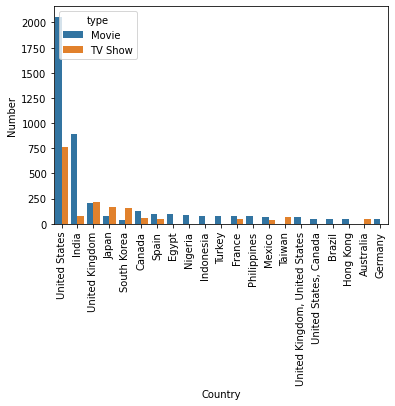

In [ ]:
country_plot=df.loc[df["country"]!="Missing Value",['country',"type"]].value_counts(ascending=False)
country_plot=pd.DataFrame(country_plot)

country_plot=country_plot.head(30)
print(country_plot)
country_plot=country_plot.reset_index()
ax=sns.barplot(data=country_plot,x=country_plot.country,y=country_plot[0],hue=country_plot.type)
ax.tick_params(axis='x', rotation=90)
ax.set(xlabel='Country', ylabel='Number')

Split the cast column and find Actor who acted in more TV shows and movies

In [ ]:
#Spliting  the column by ","
actor_s=df["cast"].apply(lambda x: str(x).split(",")).tolist()


In [ ]:
#Creating New Data Frame and then stacking
df_new=pd.DataFrame(actor_s,index=df["title"])
df_new=df_new.stack()

In [ ]:
#
df_new=pd.DataFrame(df_new.reset_index())
df_new.rename(columns={0:"Actors"},inplace=True)
df_new.drop(["level_1"],axis=1,inplace=True)

In [ ]:
df_final=df_new.merge(df,on="title")

 Anupam Kher         39
 Rupa Bhimani        31
 Takahiro Sakurai    30
 Julie Tejwani       28
 Om Puri             27
 Rajesh Kava         26
Shah Rukh Khan       26
 Yuki Kaji           25
 Paresh Rawal        25
 Andrea Libman       25
Name: Actors, dtype: int64


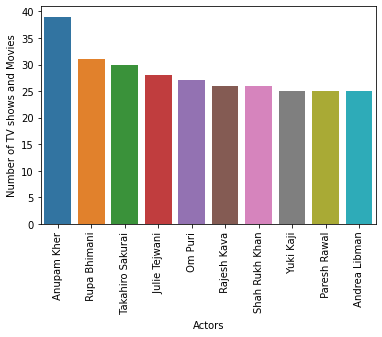

In [ ]:
y=df_final.loc[df_final["Actors"]!="Missing Value","Actors"].value_counts()
y=y.head(10)
axs=sns.barplot(x=y.index,y=y.values)
axs.tick_params(axis='x', rotation=90)
axs.set(xlabel="Actors",ylabel="Number of TV shows and Movies")
print(y)

Insights: 
Anupam Kher acted in more Movies and TV shows than anyone i.e. 39 followed by Rupa Bhimani

Similarly we split and analyse for Director column

In [ ]:
director_c=df["director"].apply(lambda x: str(x).split(",")).tolist()
df_dir=pd.DataFrame(director_c,index=df["title"])
df_dir=df_dir.stack()
df_dir=pd.DataFrame(df_dir.reset_index())
df_dir.rename(columns={0:"Directors"},inplace=True)
df_dir.drop(["level_1"],axis=1,inplace=True)
df_dir=df_dir.merge(df,on="title")

Rajiv Chilaka          22
Raúl Campos            18
 Jan Suter             18
Marcus Raboy           16
Suhas Kadav            16
Jay Karas              15
Cathy Garcia-Molina    13
Martin Scorsese        12
Jay Chapman            12
Youssef Chahine        12
Name: Directors, dtype: int64


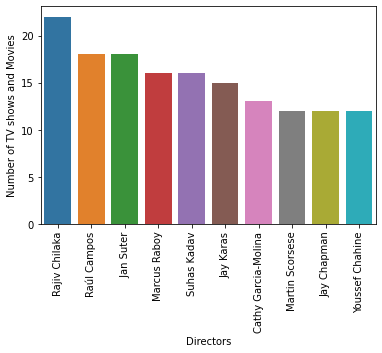

In [ ]:
z=df_dir.loc[df_dir["Directors"]!="Missing Value","Directors"].value_counts()
z=z.head(10)
axs=sns.barplot(x=z.index,y=z.values)
axs.tick_params(axis='x', rotation=90)
axs.set(xlabel="Directors",ylabel="Number of TV shows and Movies")
print(z)

Rajiv Chilaka  has acted in 22 Movies and TV shows more than any actor



### Similary for Genre and plotting it

In [ ]:
genre=df["listed_in"].apply(lambda x: str(x).split(",")).tolist()
genre[2]
df_genre=pd.DataFrame(genre,index=df["title"])
df_genre=df_genre.stack()
df_genre=pd.DataFrame(df_genre.reset_index())

df_genre.rename(columns={0:"Genres"},inplace=True)
df_genre.drop(["level_1"],axis=1,inplace=True)

In [ ]:
#Here "Dramas" has misspelled as " Dramas"
df_genre=df_genre.merge(df,on="title")
df_genre.loc[df_genre["Genres"]==" Dramas","Genres"]="Dramas"

In [ ]:
a=df_genre.loc[df_genre["Genres"]!="Missing Value","Genres"].value_counts()
a=a.head(10)
print(a)

 International Movies       2624
Dramas                      2427
Comedies                    1210
Action & Adventure           859
Documentaries                829
International TV Shows       774
 Independent Movies          736
 TV Dramas                   696
 Romantic Movies             613
Children & Family Movies     605
Name: Genres, dtype: int64


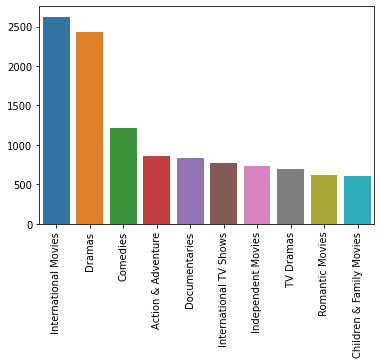

In [ ]:
a=df_genre.loc[df_genre["Genres"]!="Missing Value","Genres"].value_counts()
a=a.head(10)
axs=sns.barplot(x=a.index,y=a.values)
axs.tick_params(axis='x', rotation=90)

International Movies genre is most common Genre followed by Dramas

### Content by Day Name

[Text(0, 0.5, 'Total Number'), Text(0.5, 0, 'Day of the Week')]

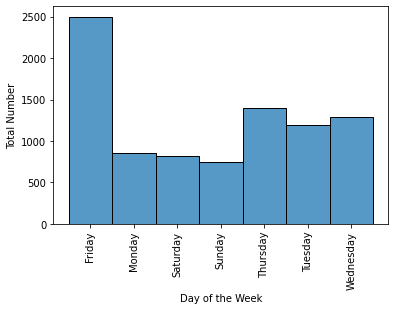

In [ ]:
#sorting and plotting content based on Day of the week
dfday=df["day_of_week"]
dfday=dfday.sort_values()
axs=sns.histplot(data=dfday,x=dfday.values)
axs.tick_params(axis='x', rotation=90)
axs.set(xlabel="Day of the Week",ylabel="Total Number")

More Content is released on Friday than other days

[Text(0, 0.5, 'Total Movies and TV Shows'), Text(0.5, 0, 'Day of Month')]

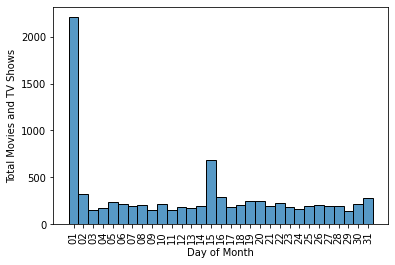

In [ ]:

dfm=df.loc[df["year"]!="NaT","day"]
dfm=dfm.sort_values()
axs=sns.histplot(data=dfm,x=dfm.values)
axs.tick_params(axis='x', rotation=90)
axs.set(xlabel="Day of Month",ylabel="Total Movies and TV Shows")

More Content is listed on 1st of every month than any other day

### Correlation between Release Year and Listed Year

In [ ]:
#Correlation matrix between year and release year
data=df.loc[df["year"]!="NaT",["year","release_year"]]
# data.loc["release_year"]=data["release_year"].astype("int64")
data["year"]=data["year"].astype("int64")
data["release_year"].value_counts()
data.corr("pearson")



,year,release_year
year,1.000000,0.111531
release_year,0.111531,1.000000


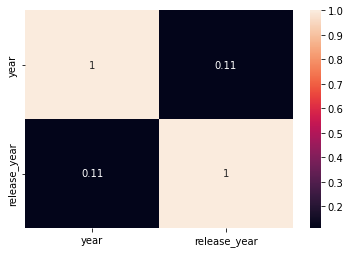

In [ ]:
#Heatmap
sns.heatmap(data.corr(),annot=True)

Listed Year and Release Year have correlation of 0.11 that implies 11% of content released get listed on Netflix that year itself